## Lesson 5: Text Generation with Vertex AI

#### Project environment setup

- Load credentials and relevant Python Libraries

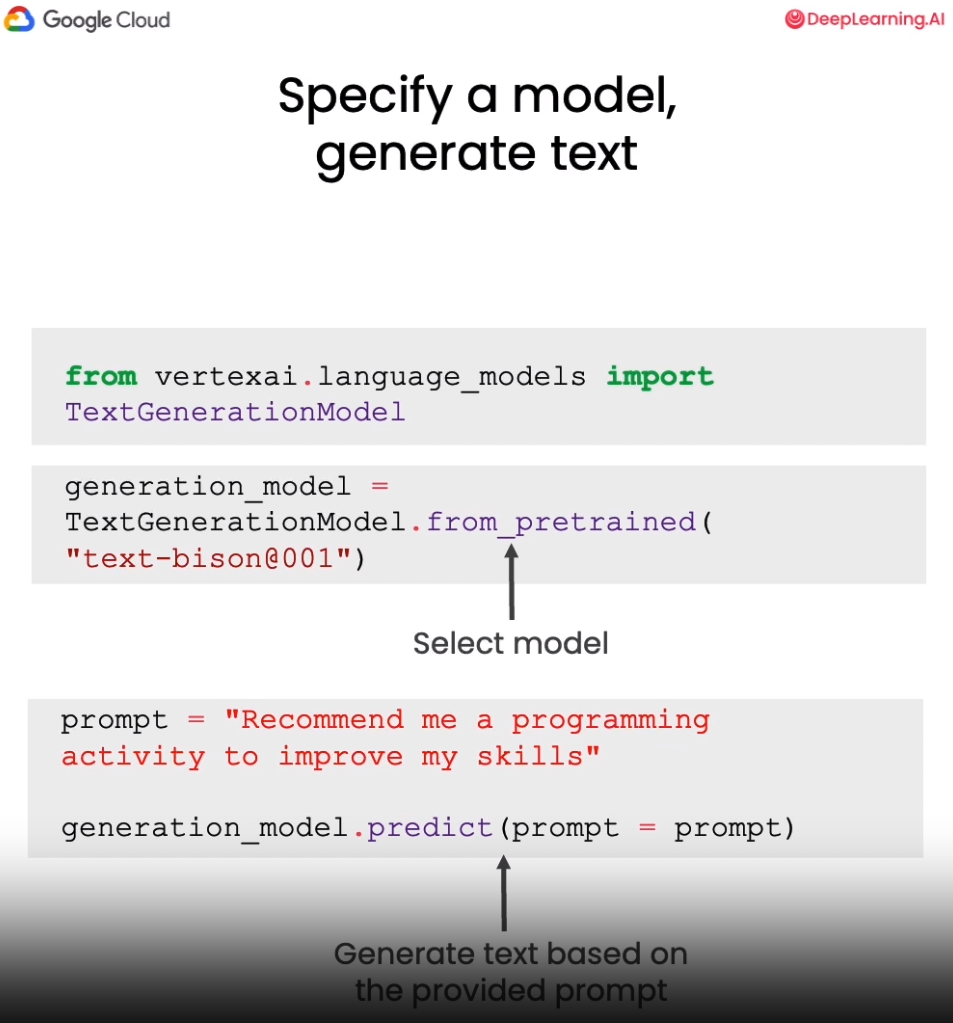

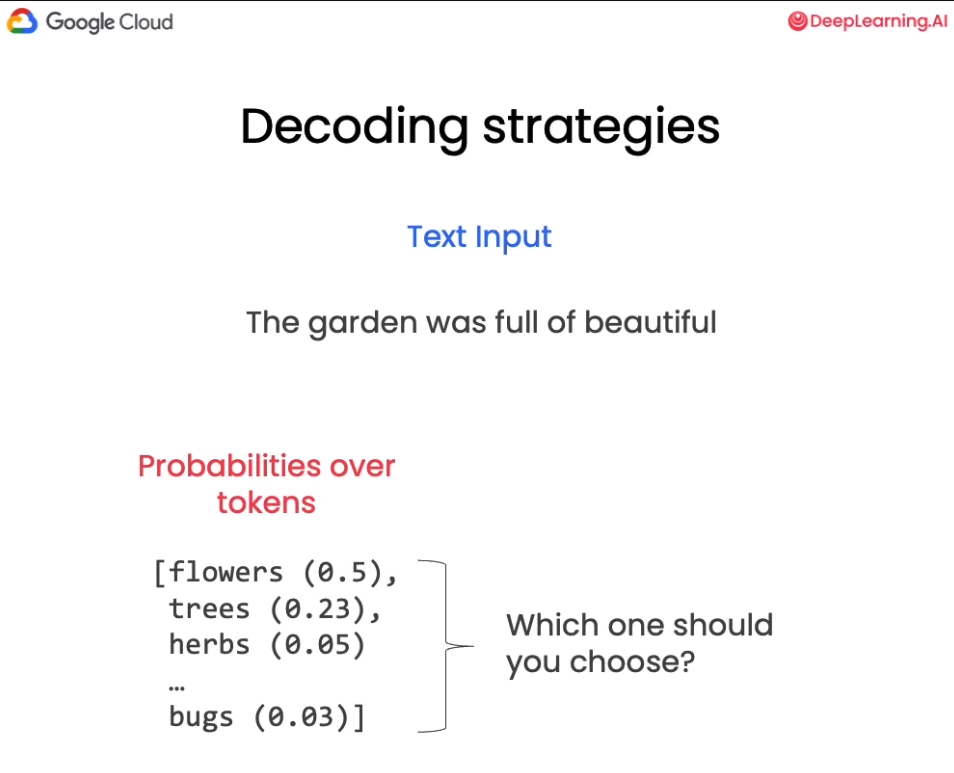

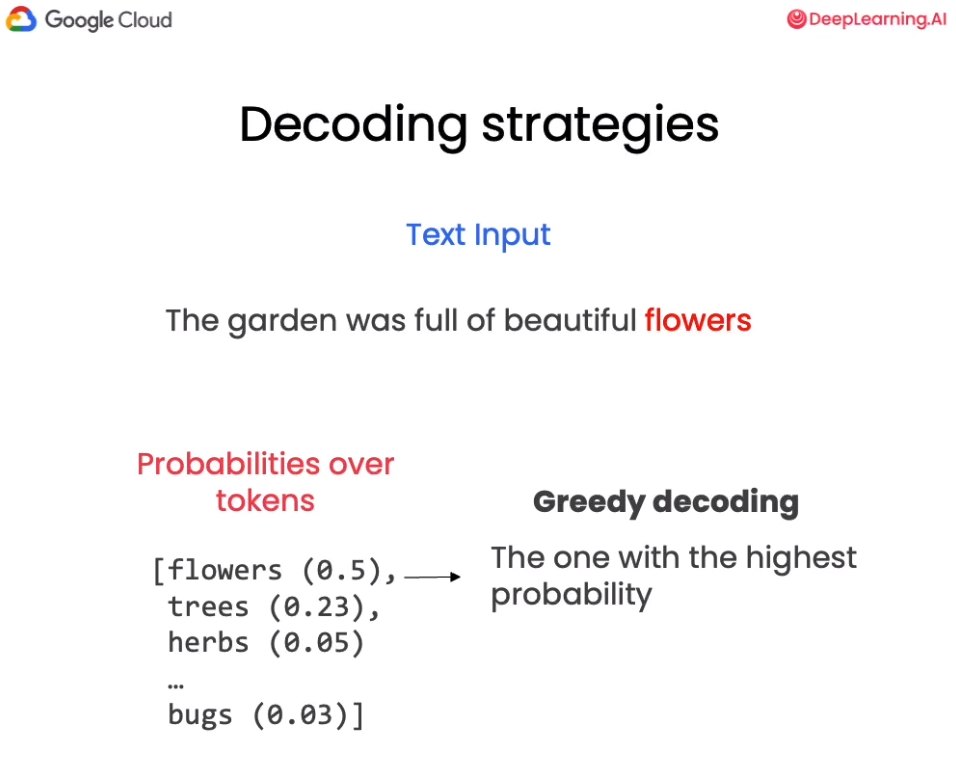

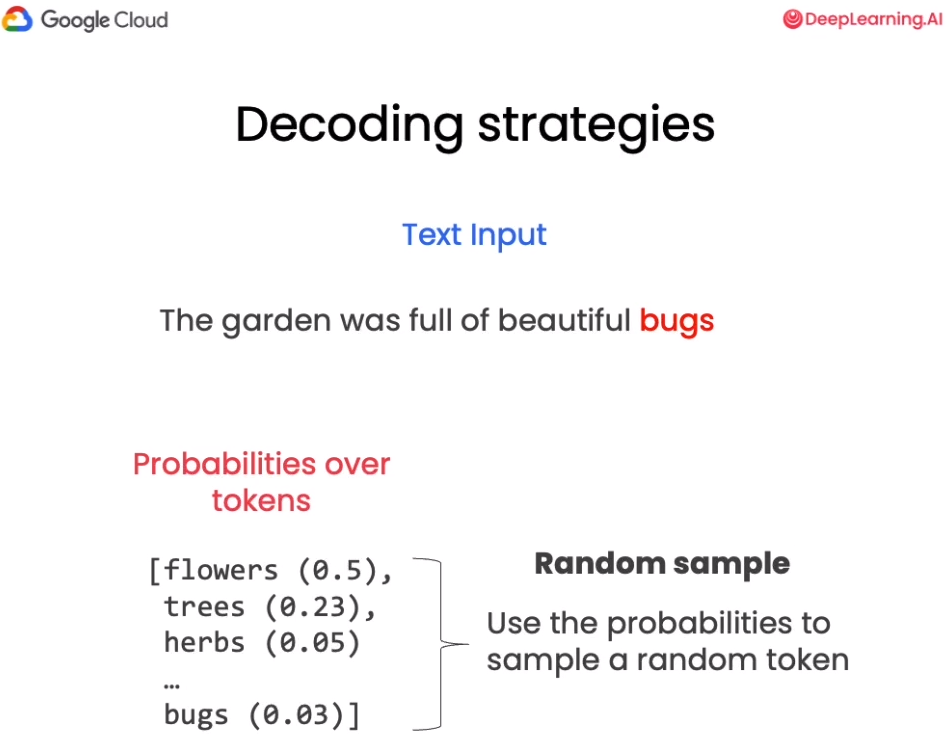

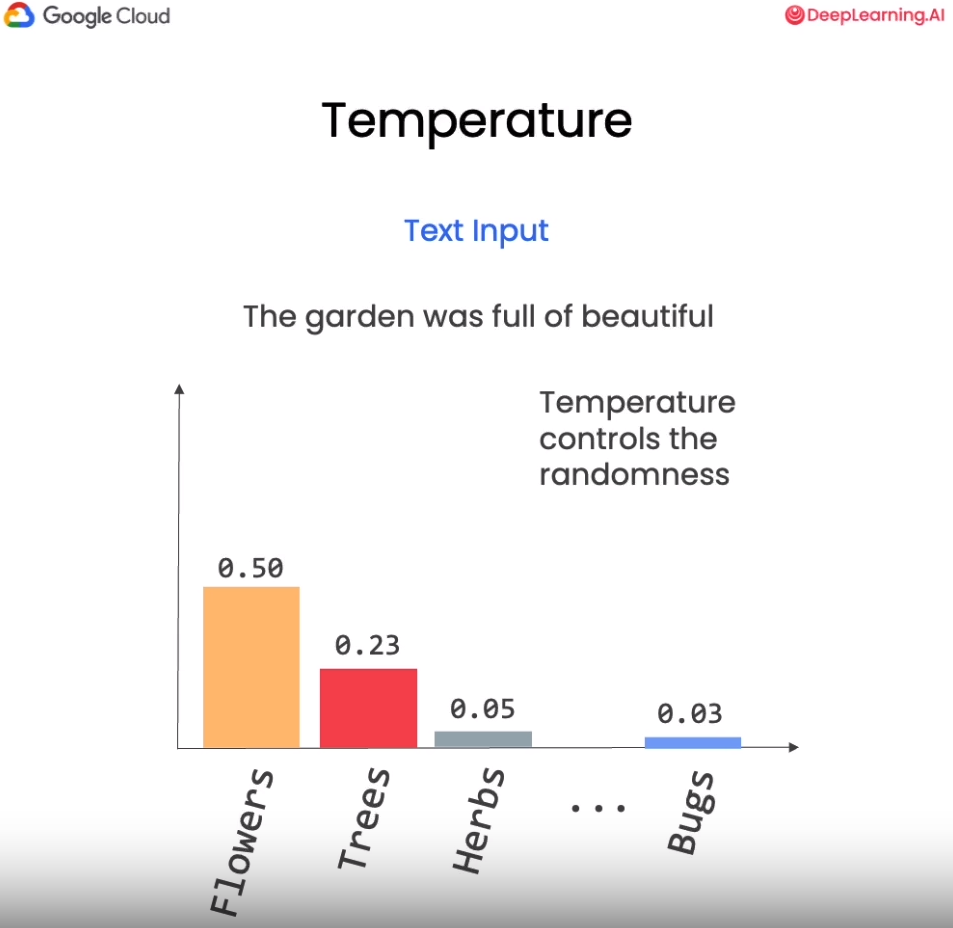

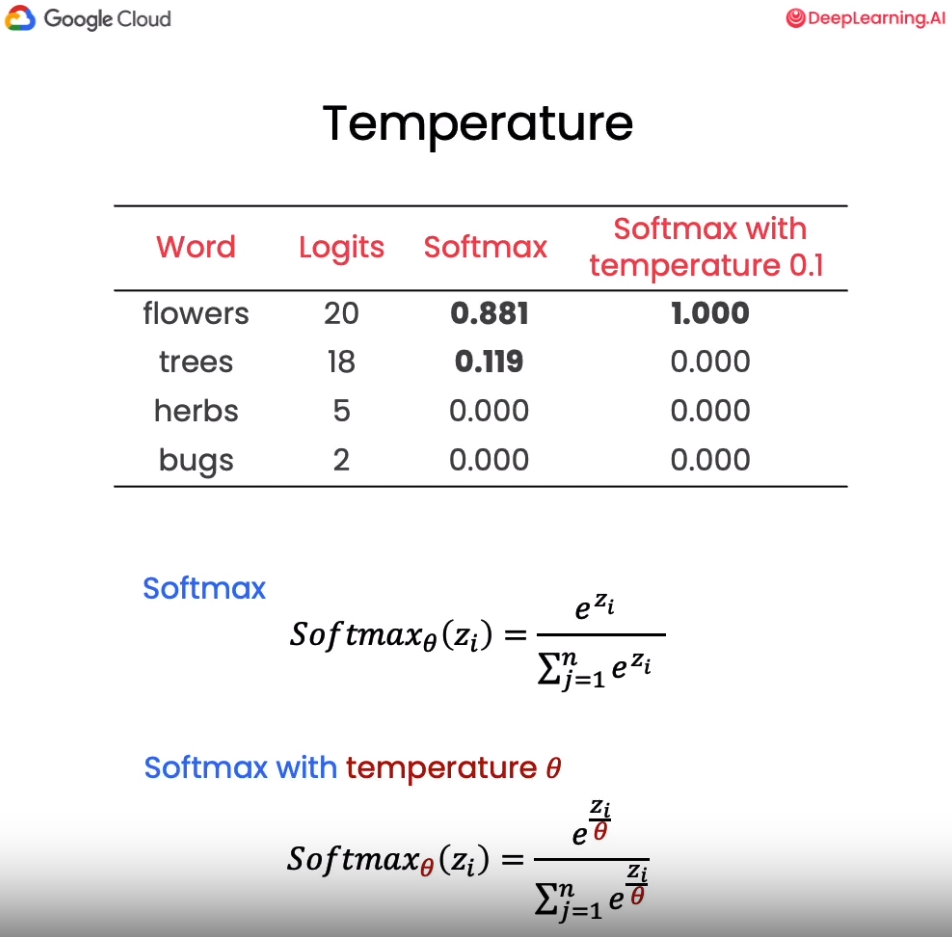

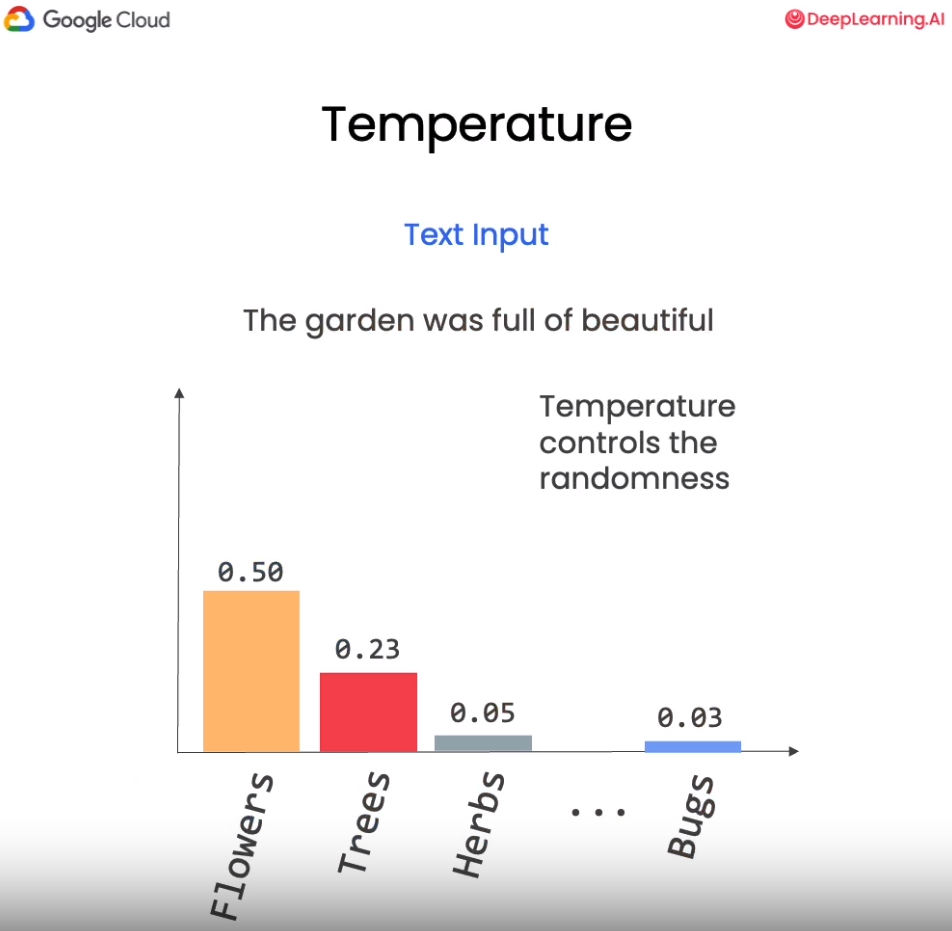

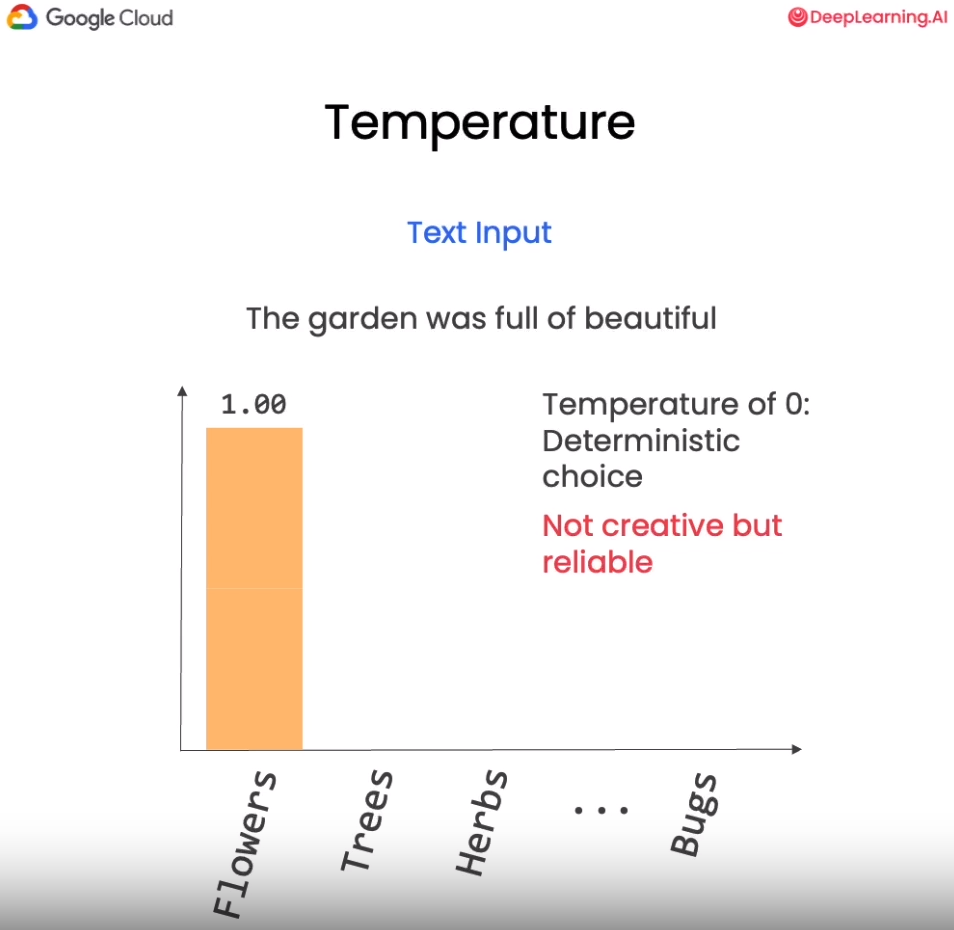



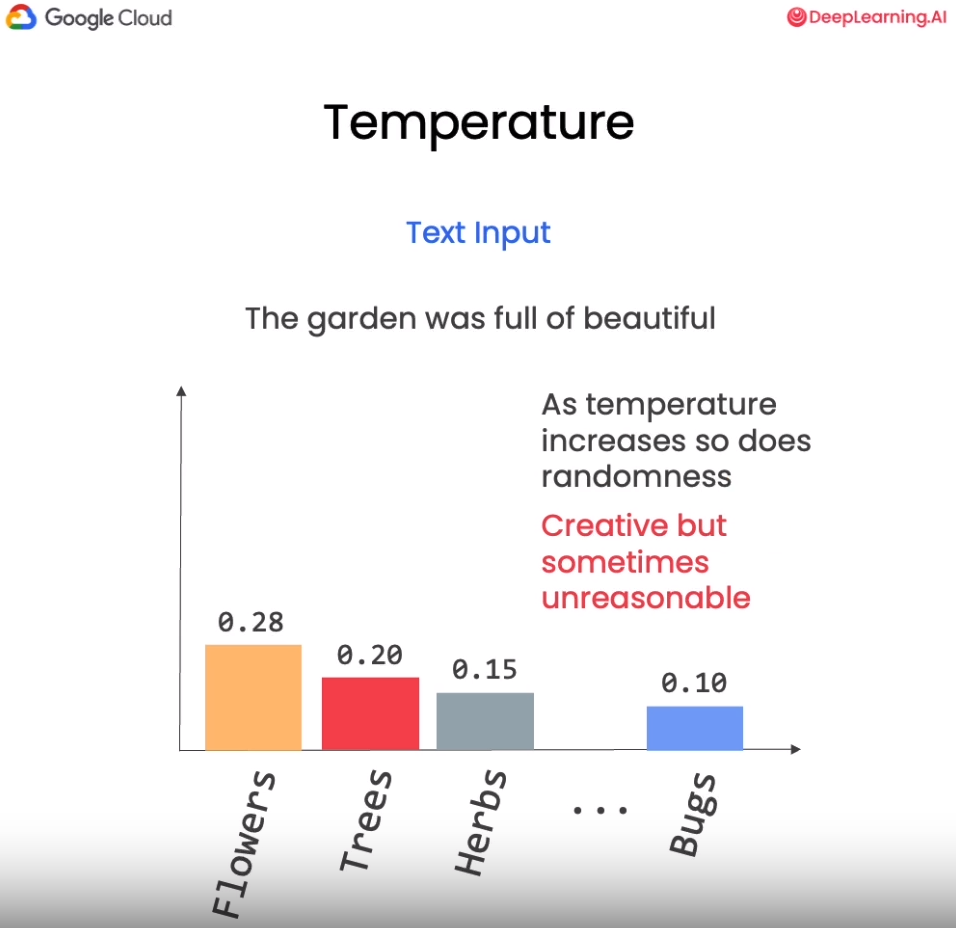

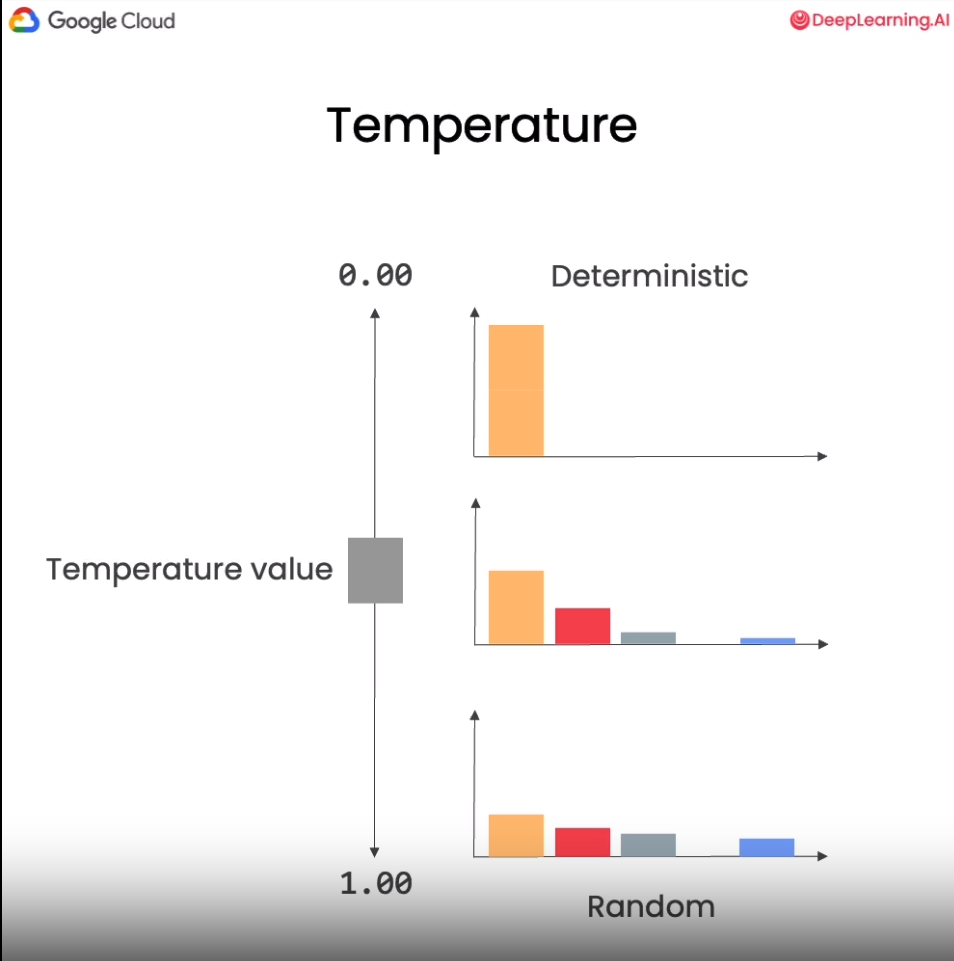

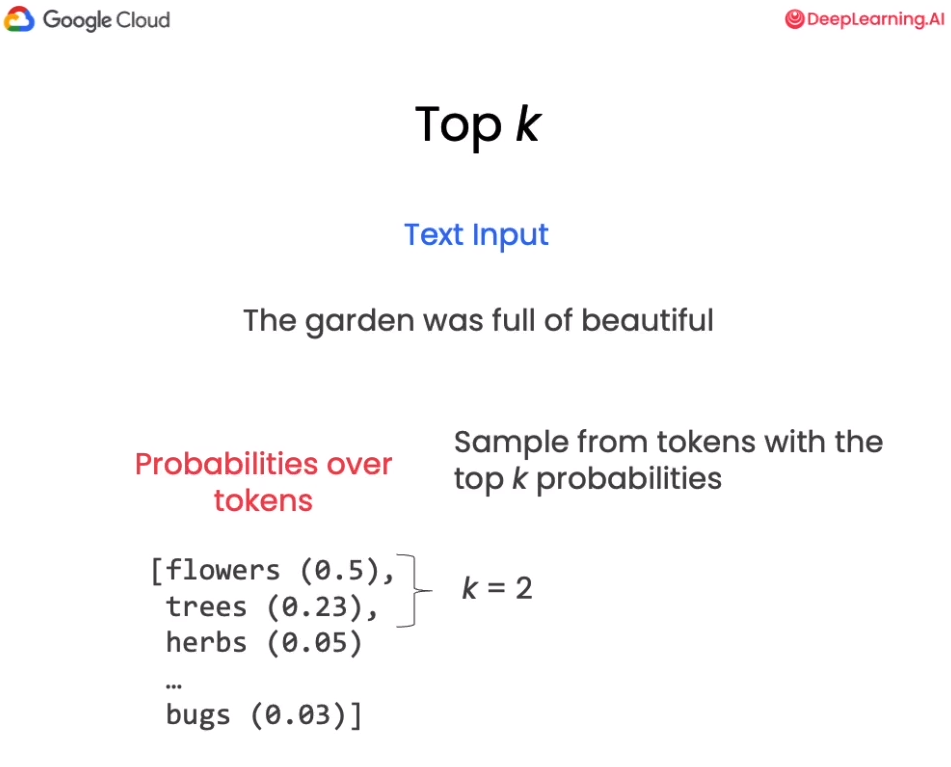

top_k -> works well for usecases where several words have uniform distribution But doesnot work well for skewed distribution

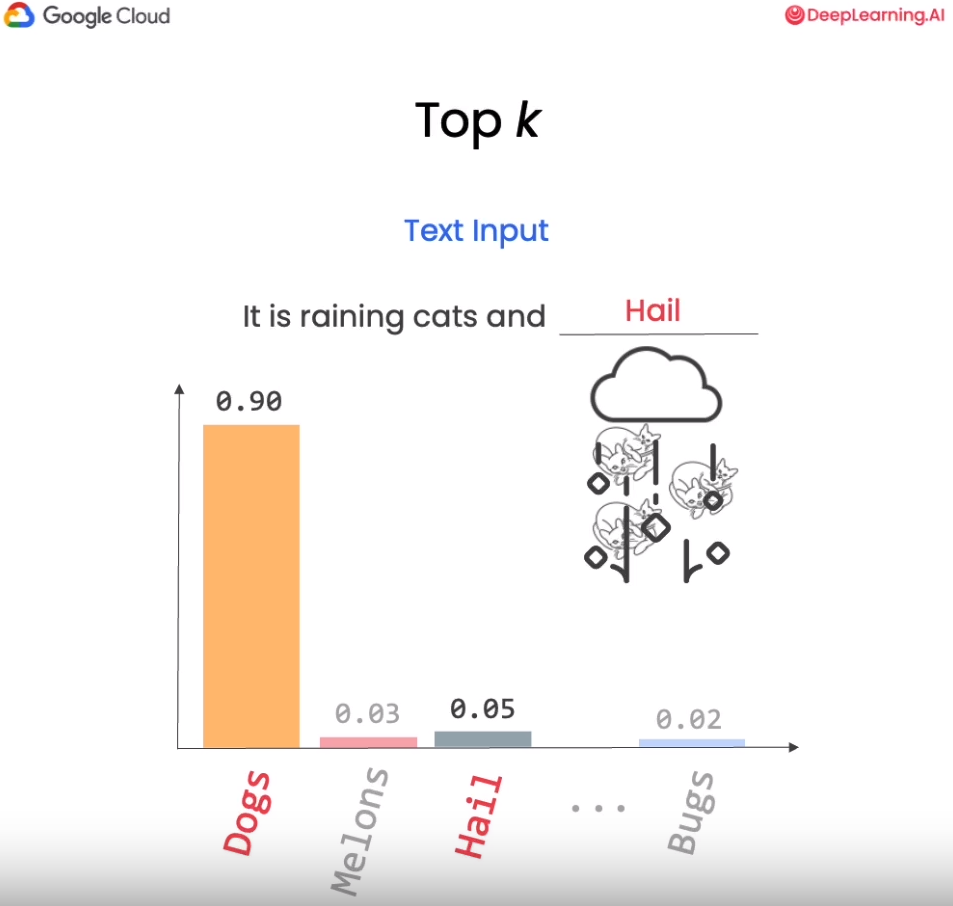

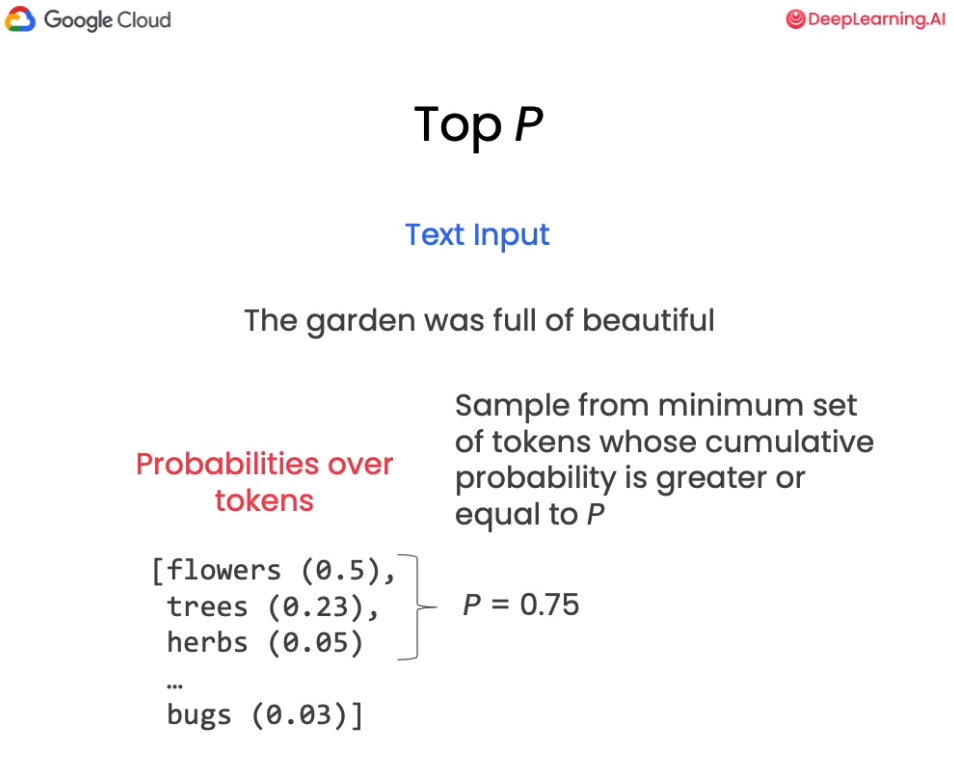

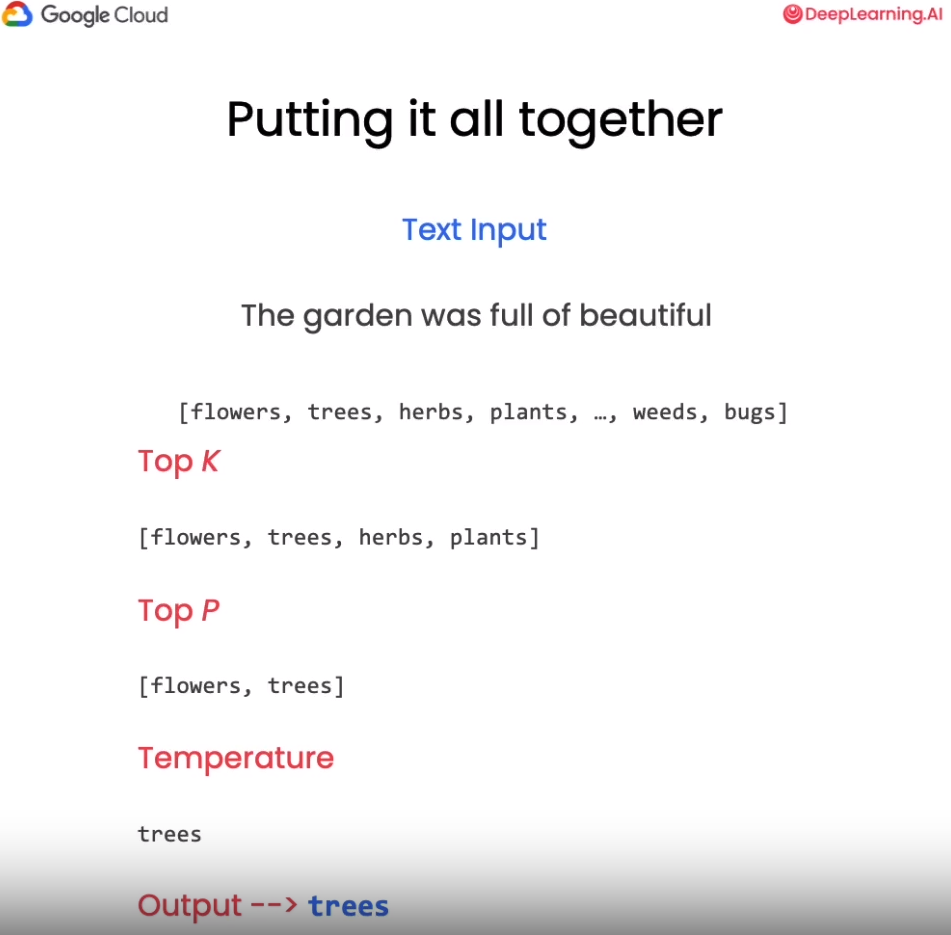

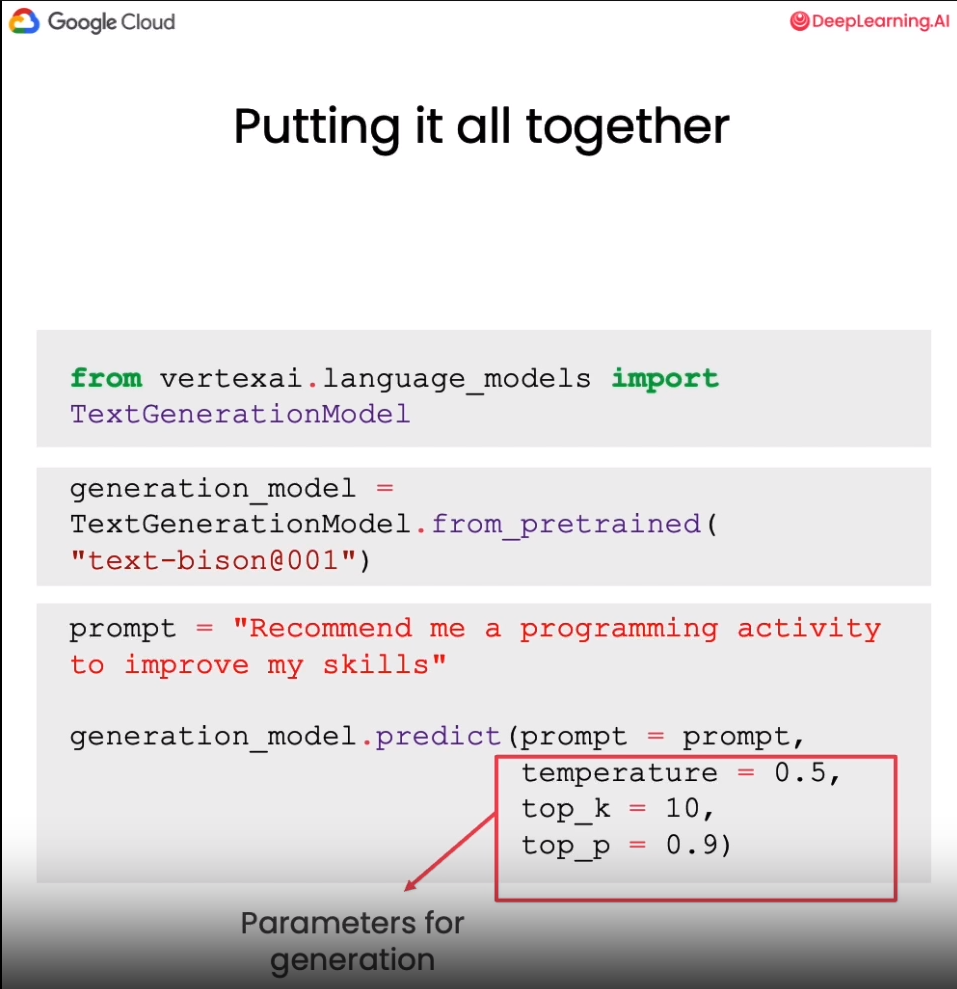

top_k -> works well for usecases where several words have uniform distribution But doesnot work well for skewed distribution

In [1]:
from utils import authenticate
credentials, PROJECT_ID = authenticate()

In [2]:
REGION = 'us-central1'

### Prompt the model
- We'll import a language model that has been trained to handle a variety of natural language tasks, `text-bison@001`.
- For multi-turn dialogue with a language model, you can use, `chat-bison@001`.

In [3]:
import vertexai
vertexai.init(project=PROJECT_ID, 
              location=REGION, 
              credentials = credentials)

In [4]:
from vertexai.language_models import TextGenerationModel

In [5]:
# single Q/A model
generation_model = TextGenerationModel.from_pretrained(
    "text-bison@001")

In [6]:
#chat-bison # for chat

#### Question Answering
- You can ask an open-ended question to the language model.

In [7]:
prompt = "I'm a high school student. \
Recommend me a programming activity to improve my skills."

In [8]:
print(generation_model.predict(prompt=prompt).text)

* **Write a program to solve a problem you're interested in.** This could be anything from a game to a tool to help you with your studies. The important thing is that you're interested in the problem and that you're motivated to solve it.
* **Take a programming course.** There are many online and offline courses available, so you can find one that fits your schedule and learning style.
* **Join a programming community.** There are many online and offline communities where you can connect with other programmers and learn from each other.
* **Read programming books and articles.** There is a


#### Classify and elaborate
- For more predictability of the language model's response, you can also ask the language model to choose among a list of answers and then elaborate on its answer.

In [9]:
prompt = """I'm a high school student. \
Which of these activities do you suggest and why:
a) learn Python
b) learn Javascript
c) learn Fortran
"""

In [10]:
print(generation_model.predict(prompt=prompt).text)

I would suggest learning Python. Python is a general-purpose programming language that is easy to learn and has a wide range of applications. It is used in a variety of fields, including web development, data science, and machine learning. Python is also a popular language for beginners, as it has a large community of support and resources available.


#### Extract information and format it as a table

In [11]:
prompt = """ A bright and promising wildlife biologist \
named Jesse Plank (Amara Patel) is determined to make her \
mark on the world. 
Jesse moves to Texas for what she believes is her dream job, 
only to discover a dark secret that will make \
her question everything. 
In the new lab she quickly befriends the outgoing \
lab tech named Maya Jones (Chloe Nguyen), 
and the lab director Sam Porter (Fredrik Johansson). 
Together the trio work long hours on their research \
in a hope to change the world for good. 
Along the way they meet the comical \
Brenna Ode (Eleanor Garcia) who is a marketing lead \
at the research institute, 
and marine biologist Siri Teller (Freya Johansson).

Extract the characters, their jobs \
and the actors who played them from the above message as a table
"""

In [12]:
response = generation_model.predict(prompt=prompt)

print(response.text)

| Character | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson |


- You can copy-paste the text into a markdown cell to see if it displays a table.

| Character | Job | Actor |
|---|---|---|
| Jesse Plank | Wildlife Biologist | Amara Patel |
| Maya Jones | Lab Tech | Chloe Nguyen |
| Sam Porter | Lab Director | Fredrik Johansson |
| Brenna Ode | Marketing Lead | Eleanor Garcia |
| Siri Teller | Marine Biologist | Freya Johansson |

### Adjusting Creativity/Randomness
- You can control the behavior of the language model's decoding strategy by adjusting the temperature, top-k, and top-n parameters.
- For tasks for which you want the model to consistently output the same result for the same input, (such as classification or information extraction), set temperature to zero.
- For tasks where you desire more creativity, such as brainstorming, summarization, choose a higher temperature (up to 1).

In [13]:
temperature = 0.0

In [14]:
prompt = "Complete the sentence: \
As I prepared the picture frame, \
I reached into my toolkit to fetch my:"

In [15]:
response = generation_model.predict(
    prompt=prompt,
    temperature=temperature,
)

In [16]:
print(f"[temperature = {temperature}]")
print(response.text)

[temperature = 0.0]
As I prepared the picture frame, I reached into my toolkit to fetch my hammer.


In [17]:
temperature = 1.0

In [18]:
response = generation_model.predict(
    prompt=prompt,
    temperature=temperature,
)

In [19]:
print(f"[temperature = {temperature}]")
print(response.text)

[temperature = 1.0]
As I prepared the picture frame, I reached into my toolkit to fetch my level.


#### Top P
- Top p: sample the minimum set of tokens whose probabilities add up to probability `p` or greater.
- The default value for `top_p` is `0.95`.
- If you want to adjust `top_p` and `top_k` and see different results, remember to set `temperature` to be greater than zero, otherwise the model will always choose the token with the highest probability.

In [20]:
top_p = 0.2

In [21]:
prompt = "Write an advertisement for jackets \
that involves blue elephants and avocados."

In [22]:
response = generation_model.predict(
    prompt=prompt, 
    temperature=0.9, 
    top_p=top_p,
)

In [23]:
print(f"[top_p = {top_p}]")
print(response.text)

[top_p = 0.2]
**Introducing the new Blue Elephant Avocado Jacket!**

This jacket is the perfect way to show off your unique style. With its bright blue color and fun avocado print, you'll be sure to turn heads wherever you go.

The Blue Elephant Avocado Jacket is made from high-quality materials that will keep you warm and comfortable all day long. It's also water-resistant, so you can wear it on rainy days without having to worry about getting wet.

Whether you're running errands, going to a party, or just hanging out, the Blue Elephant Avocado Jacket is the perfect way to add a


#### Top k
- The default value for `top_k` is `40`.
- You can set `top_k` to values between `1` and `40`.
- The decoding strategy applies `top_k`, then `top_p`, then `temperature` (in that order).

In [24]:
top_k = 20
top_p = 0.7

In [25]:
response = generation_model.predict(
    prompt=prompt, 
    temperature=0.9, 
    top_k=top_k,
    top_p=top_p,
)

In [26]:
print(f"[top_p = {top_p}]")
print(response.text)

[top_p = 0.7]
**Introducing the new Blue Elephant Avocado Jacket!**

This jacket is the perfect way to show your love of both blue elephants and avocados. It's made from a soft, durable fabric that will keep you warm and comfortable all day long. And the fun print is sure to turn heads wherever you go.

Whether you're wearing it to the park, to the grocery store, or to a party, the Blue Elephant Avocado Jacket is sure to make you smile. So what are you waiting for? Order yours today!

**Here are some of the benefits of owning a Blue Elephant Avocado Jacket:**

